In [123]:
import pandas as pd

# Đường dẫn đến tệp Excel
file_path = './input/label.xlsx'

# Đọc tệp Excel
datatimeOA = pd.read_excel(file_path)

# Hiển thị các dòng đầu tiên của DataFrame
print(datatimeOA.head())
datatimeOA['StartDate'] = pd.to_datetime(datatimeOA['StartDate'], format='%H:%M:%S')

# Tính toán endDate bằng cách thêm duration (tính bằng giờ) vào StartDate
datatimeOA['endDate'] = datatimeOA['StartDate'] + pd.to_timedelta(datatimeOA['duration'], unit='s')

# Hiển thị các dòng đầu tiên của DataFrame sau khi tính toán
print(datatimeOA.head())

  StartDate  duration  hy
0  12:43:06     18.49  hy
1  12:44:55     13.36  hy
2  12:46:27     10.55  hy
3  12:46:41     10.60  hy
4  12:46:56     10.80  hy
            StartDate  duration  hy                 endDate
0 1900-01-01 12:43:06     18.49  hy 1900-01-01 12:43:24.490
1 1900-01-01 12:44:55     13.36  hy 1900-01-01 12:45:08.360
2 1900-01-01 12:46:27     10.55  hy 1900-01-01 12:46:37.550
3 1900-01-01 12:46:41     10.60  hy 1900-01-01 12:46:51.600
4 1900-01-01 12:46:56     10.80  hy 1900-01-01 12:47:06.800


In [124]:
datatimeOA['endDate'] = pd.to_datetime(datatimeOA['endDate'], format='%H:%M:%S:%f')

In [125]:
import pandas as pd

# Đường dẫn đến tệp Excel
file_path = './input/audio.xlsx'

# Đọc tệp Excel
flowData = pd.read_excel(file_path)



# Hiển thị các dòng đầu tiên của DataFrame
print(flowData.head())

           time       value
0  00:37:06:186  106.784265
1  00:37:06:196  104.678488
2  00:37:06:206  103.732414
3  00:37:06:216  101.779229
4  00:37:06:226  100.894192


In [126]:
def convert_hour_to_12(dt):
    if dt.hour == 0:
        return dt.replace(hour=12)
    return dt

In [127]:
flowData['time'] = pd.to_datetime(flowData['time'], format='%H:%M:%S:%f')
flowData['time'] = flowData['time'].apply(convert_hour_to_12)
flowData['nhan'] = 0
print(flowData.head())

                     time       value  nhan
0 1900-01-01 12:37:06.186  106.784265     0
1 1900-01-01 12:37:06.196  104.678488     0
2 1900-01-01 12:37:06.206  103.732414     0
3 1900-01-01 12:37:06.216  101.779229     0
4 1900-01-01 12:37:06.226  100.894192     0


In [128]:
for index, row in datatimeOA.iterrows():
    mask = (flowData['time'] >= row['StartDate']) & (flowData['time'] <= row['endDate'])
    flowData.loc[mask, 'nhan'] = 1
    

print(flowData.head())

                     time       value  nhan
0 1900-01-01 12:37:06.186  106.784265     0
1 1900-01-01 12:37:06.196  104.678488     0
2 1900-01-01 12:37:06.206  103.732414     0
3 1900-01-01 12:37:06.216  101.779229     0
4 1900-01-01 12:37:06.226  100.894192     0


In [129]:
flowData_nhan_1 = flowData[flowData['nhan'] == 1]
print(flowData_nhan_1)

                           time      value  nhan
35983   1900-01-01 12:43:06.006  57.924131     1
35984   1900-01-01 12:43:06.016  58.473464     1
35985   1900-01-01 12:43:06.026  58.809168     1
35986   1900-01-01 12:43:06.036  58.992279     1
35987   1900-01-01 12:43:06.046  58.992279     1
...                         ...        ...   ...
1048570 1900-01-01 03:31:51.606  55.543687     1
1048571 1900-01-01 03:31:51.616  54.780725     1
1048572 1900-01-01 03:31:51.626  54.780725     1
1048573 1900-01-01 03:31:51.636  54.780725     1
1048574 1900-01-01 03:31:51.646  55.299539     1

[629144 rows x 3 columns]


In [130]:
import math
def create_training_data(data, window_size, step_size):

    _train = []
    _label = []

    for i in range(0, data.shape[0] - window_size, step_size):
        try:
            xs = data['value'].values[i: i + window_size]
        
            # Skip examples where the activity label changes within the window.
            if (data['nhan'][i+1] != data['nhan'][i + window_size-1]):
                print(f"Skipping index {i} due to label change within window.")
                continue

            label = data['nhan'][i + window_size-1]

            # Skip examples where the label is NaN.
            if math.isnan(label):
                print(f"Skipping index {i} due to NaN label.")
                continue

            _train.append(xs)
            _label.append(label)
        
        except Exception as e:
            print(f"An error occurred at index {i}: {e}")

    return _train, _label

In [131]:
_train, _label = create_training_data(
    data=flowData, window_size=4000, step_size=1000)

Skipping index 32000 due to label change within window.
Skipping index 33000 due to label change within window.
Skipping index 36000 due to label change within window.
Skipping index 37000 due to label change within window.
Skipping index 43000 due to label change within window.
Skipping index 44000 due to label change within window.
Skipping index 47000 due to label change within window.
Skipping index 48000 due to label change within window.
Skipping index 53000 due to label change within window.
Skipping index 54000 due to label change within window.
Skipping index 55000 due to label change within window.
Skipping index 56000 due to label change within window.
Skipping index 59000 due to label change within window.
Skipping index 71000 due to label change within window.
Skipping index 72000 due to label change within window.
Skipping index 80000 due to label change within window.
Skipping index 88000 due to label change within window.
Skipping index 89000 due to label change within 

In [132]:
import numpy as np


(128, 8)


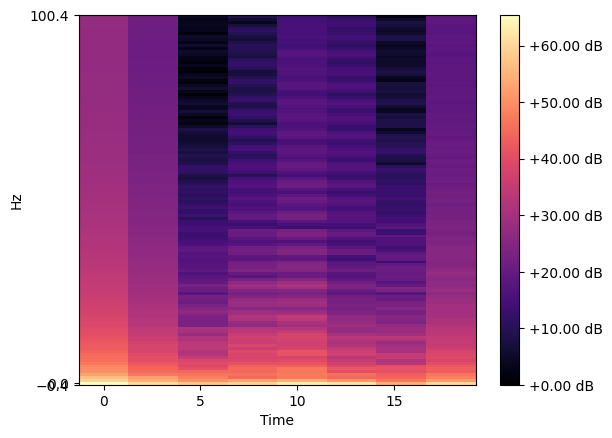

In [133]:
import librosa.display
import matplotlib.pyplot as plt
audio_data = _train[0]

audio_data = np.array(audio_data).astype("float")
sgram = librosa.stft(audio_data)
# librosa.display.specshow(sgram)
sgram_mag, _  = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr =1000)
print(mel_scale_sgram.shape)
# librosa.display.specshow(mel_scale_sgram)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram , ref=np.min)
librosa.display.specshow(mel_sgram ,sr =200, x_axis="time", y_axis="mel")
plt.colorbar(format='%+0.2f dB')

In [134]:
import librosa
import librosa.display
import torch
import tensorflow
def calcuMelSgram(signal):
  sgram = librosa.stft(signal)  
  sgram_mag, _  = librosa.magphase(sgram)
  mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr = 1000)
  mel_sgram = librosa.amplitude_to_db(mel_scale_sgram , ref=np.min)
  # t = torch.Tensor(mel_sgram)
  # t = tensorflow.convert_to_tensor(mel_sgram, dtype=tensorflow.float32)
  return mel_sgram

In [135]:
trainMFE = []
for i in range(len(_train)):
  audio_data = np.array(_train[i]).astype("float")
  trainMFE.append(calcuMelSgram(audio_data))

In [136]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(trainMFE, _label, test_size=0.2, random_state=42)


x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [137]:
print(x_train[0].shape)

(128, 8)


In [138]:
x_train_array = np.array(x_train.tolist())

x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], 128, 8, 1)

x_train_reshaped = x_train_reshaped.astype('float32')


x_test_array = np.array(x_test.tolist())

x_test_reshaped = x_test_array.reshape(x_test_array.shape[0], 128, 8, 1)

x_test_reshaped = x_test_reshaped.astype('float32')


from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print(x_train_array.shape)
print(x_test_array.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)
print(y_train_encoded)


(455, 128, 8)
(114, 128, 8)
(455, 2)
(114, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]


In [141]:
import numpy as np
from keras.optimizers import RMSprop,Adam






# x_train_tf = np.array([data.reshape(-1, 128, 87, 1) for data in train_df["acoustic_data"]])

# x_test_tf = np.array([data.reshape(-1, 128, 87, 1) for data in test_df["acoustic_data"]])


from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()
#
model.add(Conv2D(filters = 16, kernel_size = (5,4),padding = 'Same', 
                 activation ='relu', input_shape = (128,8,1)))
model.add(MaxPool2D(pool_size=(3,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))


optimizer = Adam(learning_rate=0.0005, beta_1=0.95, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# In tóm tắt mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(x_train_reshaped, y_train_encoded, epochs=500, validation_data=(x_test_reshaped, y_test_encoded))

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test_encoded)
print('Test accuracy:', test_acc)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 8, 16)        336       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 42, 4, 16)         0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 42, 4, 16)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 42, 4, 32)         4640      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 20, 2, 32)         0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 20, 2, 32)        